In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline


numpy.ndarray

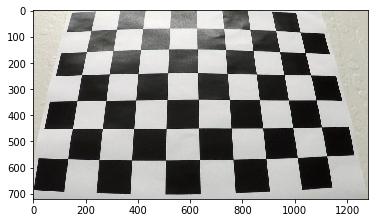

In [53]:
img = mpimg.imread('./camera_cal/calibration3.jpg')
plt.imshow(img)
type(img)

In [39]:
n_rows = 6
n_cols = 9

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (n_cols,n_rows), None)
ret
# plt.imshow(gray)

True

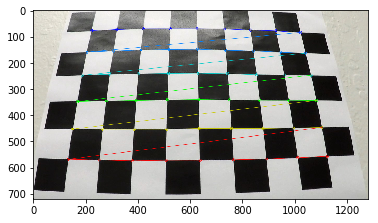

In [40]:
with_corners = cv2.drawChessboardCorners(img, (n_cols,n_rows), corners, ret)
plt.imshow(with_corners)

### Get all mappings from distorted images to object points

In [43]:
image_paths = glob.glob('./camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []

n_rows = 6
n_cols = 9

# Create a grid of 3d points
    objp = np.zeros((n_rows*n_cols, 3), np.float32)
    objp[:, :2] = np.mgrid[0:n_cols, 0:n_rows].T.reshape(-1,2)

for image_path in image_paths:
    img = mpimg.imread(image_path)
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (n_cols,n_rows), None)
    
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

### Callibrate Camera

In [57]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, gray.shape[::-1], None, None)

### Undistort Image

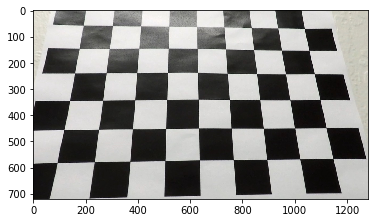

In [52]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)

### Test Distortion Correction

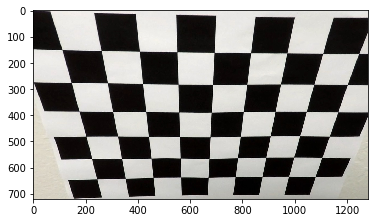

In [59]:
from distortion_correction import DistortionCorrection, path_to_image_gen
import matplotlib.image as mpimg

n_rows = 6
n_cols = 9
chessboard_paths = glob.glob('./camera_cal/calibration*.jpg')
chessboards = path_to_image_gen(chessboard_paths)
distortion_correction = DistortionCorrection()
distortion_correction.fit_to_chessboards(chessboards, n_rows, n_cols)

test_correction_img = mpimg.imread('./camera_cal/calibration2.jpg')
corrected = undistorted = distortion_correction.transform(test_correction_img)
plt.imshow(corrected)

## TODO: Put all distorted and undistorted images side by side.

(5, 2, 3)